In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
data.head()

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973


In [3]:
data['Date'] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


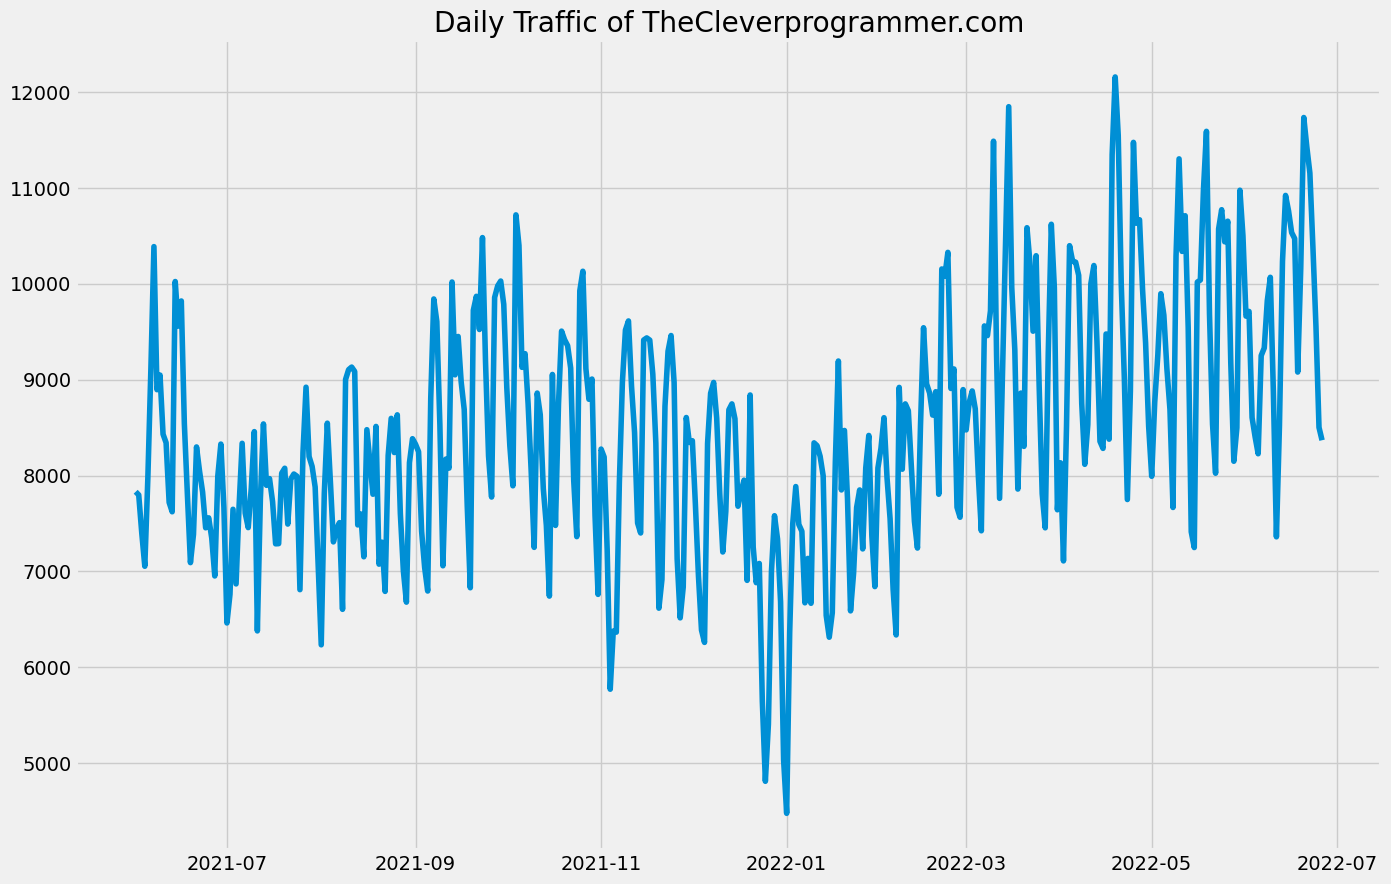

In [5]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data["Views"])
plt.title("Daily Traffic of TheCleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

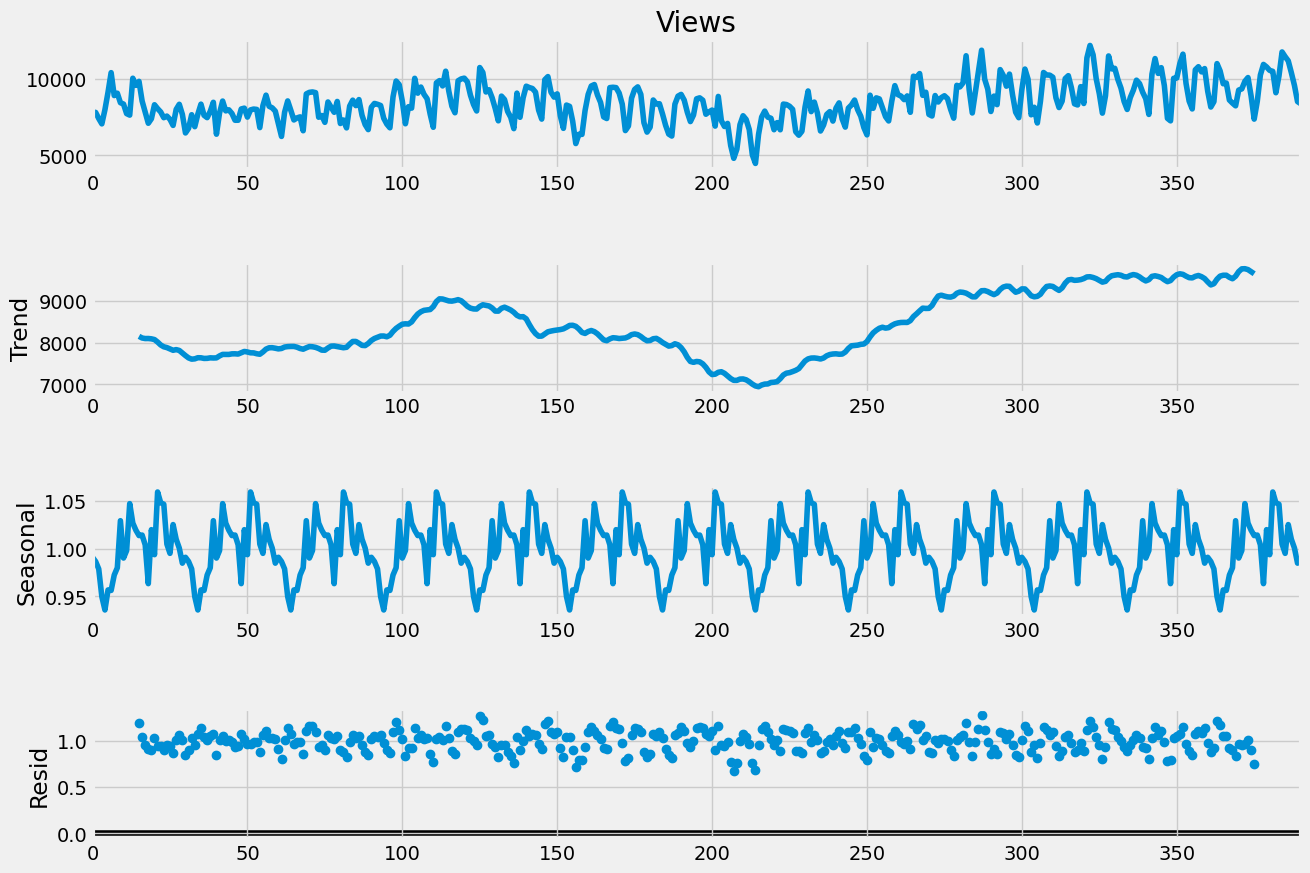

In [10]:
result = seasonal_decompose(data['Views'], model='multiplicative', period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15,10)

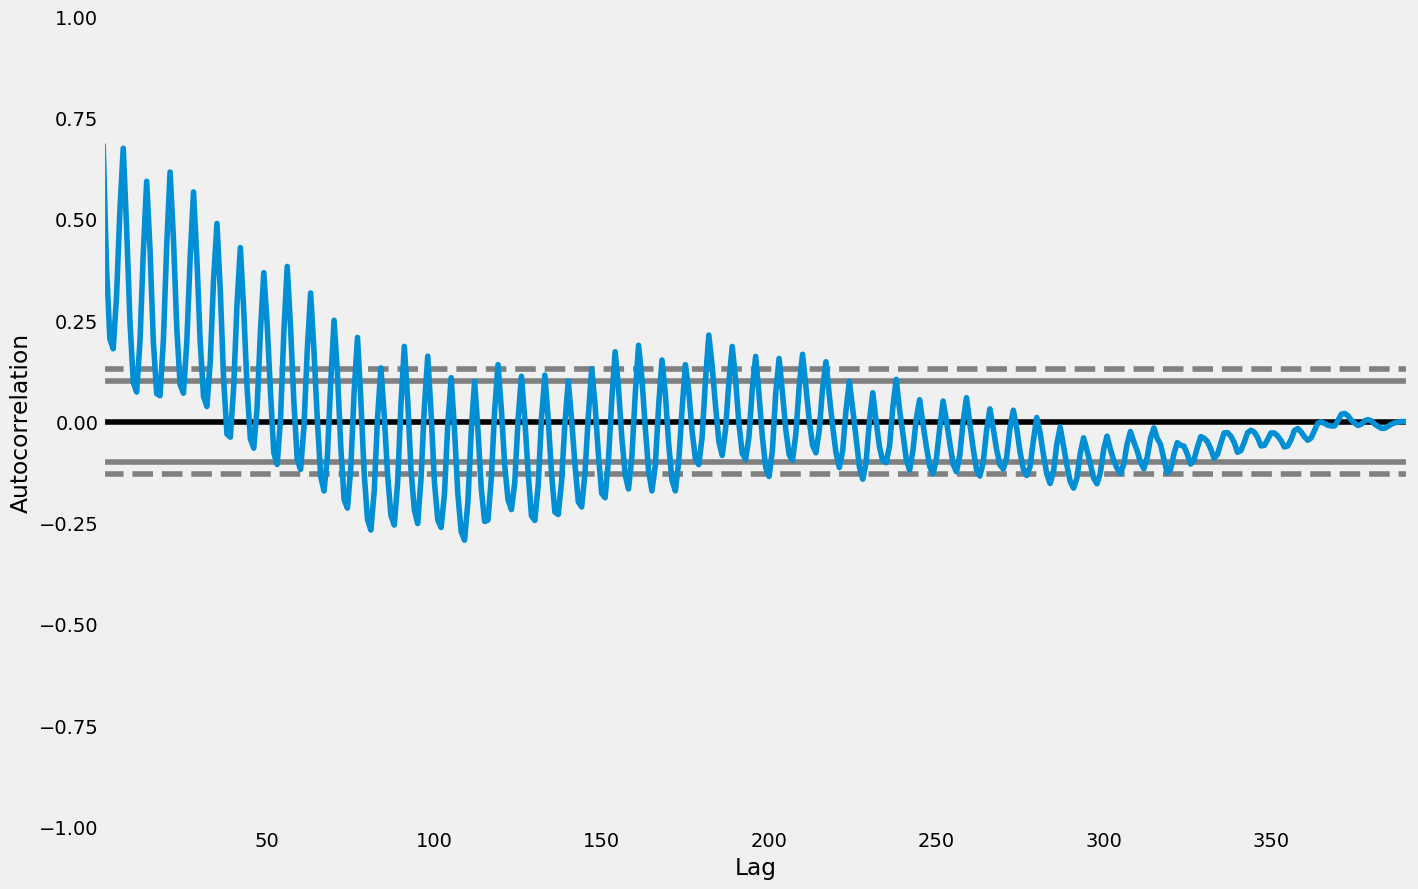

In [18]:
# ARIMA(d, p, q)    d -> (0 for data is stationary, 1 for data is Seasonal )
# foe p, q we use autocorrelation or partial autocorrelation plots.
# pd.plotting.autocorrelation_plot(data["Views"])
fig = plt.figure()
fig.set_size_inches(15,10)
fig = pd.plotting.autocorrelation_plot(data["Views"])

p = 5 due to curve is moving down after the 5th line of the first boundary.

<Figure size 640x480 with 0 Axes>

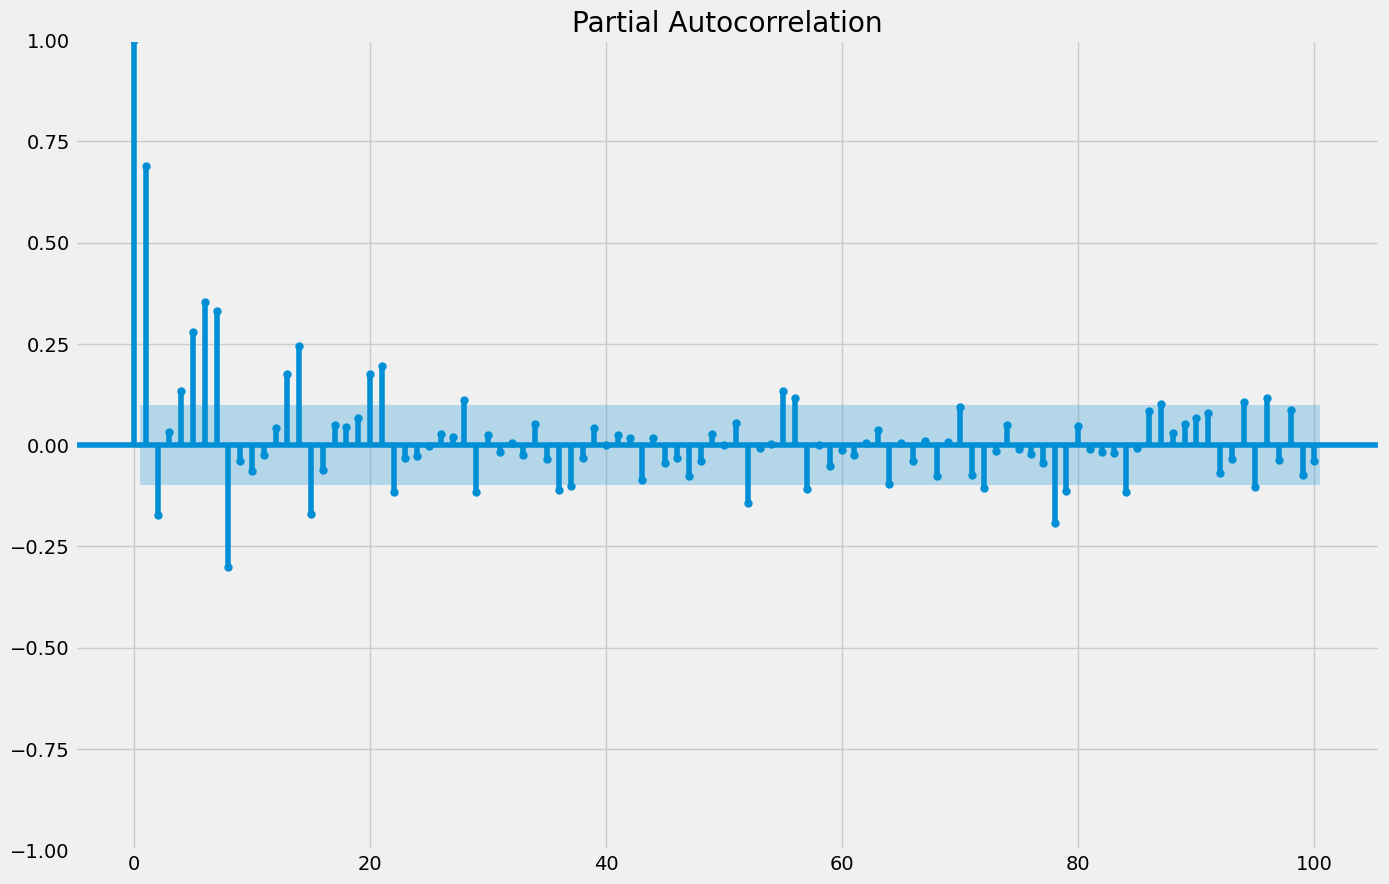

In [21]:
fig = plt.figure()
fig = plot_pacf(data["Views"], lags=100)
fig.set_size_inches(15,10)


q = 2 due to only two points are far away from all the points.

Here we can train SARIMA model for the task of website tarffic forecasting:

In [24]:
p, d, q = 5, 1, 2
model = sm.tsa.statespace.SARIMAX(data['Views'], 
                                 order=(p,d,q), 
                                 seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

c:\Users\VED\Desktop\Global Data Assignment\DataScientist-Assignment\global_data\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\VED\Desktop\Global Data Assignment\DataScientist-Assignment\global_data\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.000
Date:                            Sun, 26 Mar 2023   AIC                           6228.000
Time:                                    15:25:12   BIC                           6287.023
Sample:                                         0   HQIC                          6251.425
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7643      0.128      5.987      0.000       0.514       1.015
ar.L2         -0.7716      0.135   

Now let’s forecast traffic on the website for the next 50 days:

In [25]:
predictions = model.predict(len(data),len(data)+50)
print(predictions)

391     9841.186209
392    10769.518306
393    10777.597377
394     9925.662543
395     8867.946195
396     8292.270486
397     8902.842724
398     9658.796498
399    10272.840083
400    10641.607280
401     9930.837508
402     9380.969065
403     9013.297803
404     9011.600498
405    10432.980171
406    10963.695085
407    10934.578502
408    10156.248725
409     9486.444530
410     8612.951743
411     9089.305364
412    10275.257079
413    10591.739964
414    10851.979058
415    10347.514855
416     9485.254362
417     9011.664716
418     9100.594495
419     9846.901372
420    10244.160457
421    10784.162574
422     9997.612695
423     9594.145672
424     9020.942511
425     8761.996800
426    10058.239765
427    10831.024519
428    10959.866667
429    10474.495226
430     9492.613567
431     8669.146076
432     8624.790391
433     9973.299226
434    10493.310562
435    10910.931570
436    10556.530633
437     9395.789122
438     9160.259447
439     9275.998059
440    10201.426782


<Axes: >

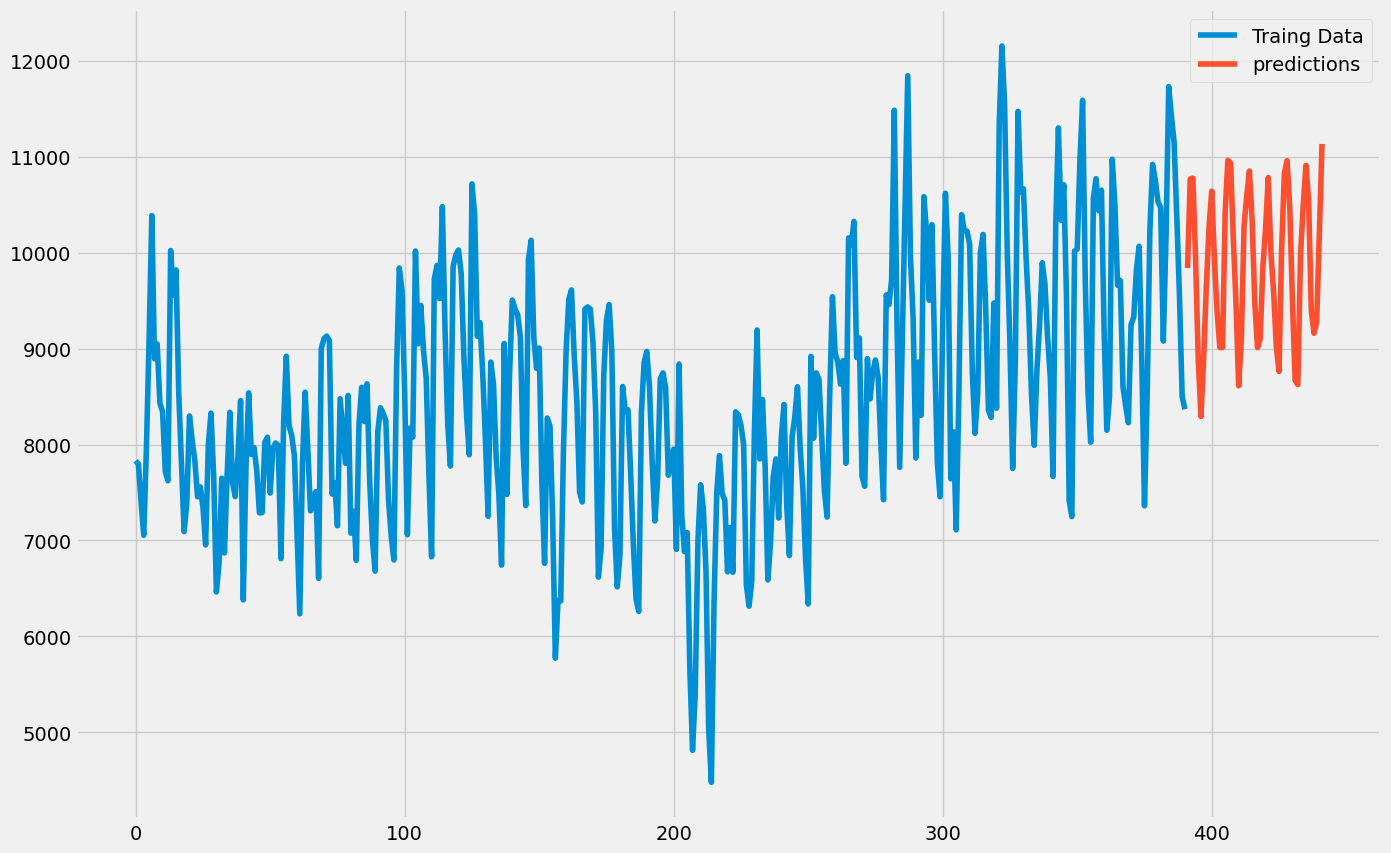

In [26]:
data['Views'].plot(legend=True, label='Traing Data',figsize=(15,10))
predictions.plot(legend=True,label='predictions')